In [1]:
import pandas as pd 
pd.set_option("display.max_columns",None)
pd.set_option("display.width",300)
df_=pd.read_excel("online_retail_II.xlsx",sheet_name="Year 2010-2011")
df=df_.copy()

In [2]:
#Aykırı değerleri baskılamak adına gerekli fonksiyonlar
def outlier_thresholds(df,variable):
    quartile1=df[variable].quantile(0.01)
    quartile3=df[variable].quantile(0.03)
    interquartile_range=quartile3-quartile1
    up_limit=quartile3+interquartile_range*1.5
    low_limit=quartile1-interquartile_range*1.5
    return low_limit,up_limit    

In [3]:
def replace_with_thresholds(dataframe, variable):
    dataframe_copy = dataframe.copy()  # DataFrame'in değiştirilmemiş bir kopyasını oluştur
    low_limit, up_limit = outlier_thresholds(dataframe_copy, variable)
    dataframe_copy.loc[(dataframe_copy[variable] < low_limit), variable] = round(low_limit, 0)
    dataframe_copy.loc[(dataframe_copy[variable] > up_limit), variable] = round(up_limit, 0)
    return dataframe_copy

In [4]:
def modify_dataset(df):
    #dataset hakkında bilgileri gözden geçirmek
    df.shape
    df.head()
    df.info()
    df.isnull().sum()
    df.describe().T
    #StockCode POST olanları drop etme işlemi,POST her faturaya eklenen bedel, ürünü ifade etmemektedir.
    df=df[df["StockCode"]!="POST"]
    #Boş değerleri dataframeden çıkarmak 
    df=df.dropna()
    #Invoice kolonu içerisinde 'C' karakteri bulunan değerleri çıkarmak,C faturanın iptalini ifade etmektedir.
    df['Invoice'] = df['Invoice'].astype(str)
    df = df[~df["Invoice"].str.contains("C")]
    #Price değeri sıfırdan küçük olan gözlem birimlerini filtreleyiniz.
    df=df[df["Price"]>0]

In [5]:
modify_dataset(df)
#Fonksiyondan sonra datasetini incelemek 
df["Description"].nunique()
df["Description"].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      541910 non-null  object        
 1   StockCode    541910 non-null  object        
 2   Description  540456 non-null  object        
 3   Quantity     541910 non-null  int64         
 4   InvoiceDate  541910 non-null  datetime64[ns]
 5   Price        541910 non-null  float64       
 6   Customer ID  406830 non-null  float64       
 7   Country      541910 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


Description
WHITE HANGING HEART T-LIGHT HOLDER     2369
REGENCY CAKESTAND 3 TIER               2200
JUMBO BAG RED RETROSPOT                2159
PARTY BUNTING                          1727
LUNCH BAG RED RETROSPOT                1638
                                       ... 
Missing                                   1
historic computer difference?....se       1
DUSTY PINK CHRISTMAS TREE 30CM            1
WRAP BLUE RUSSIAN FOLKART                 1
PINK BERTIE MOBILE PHONE CHARM            1
Name: count, Length: 4223, dtype: int64

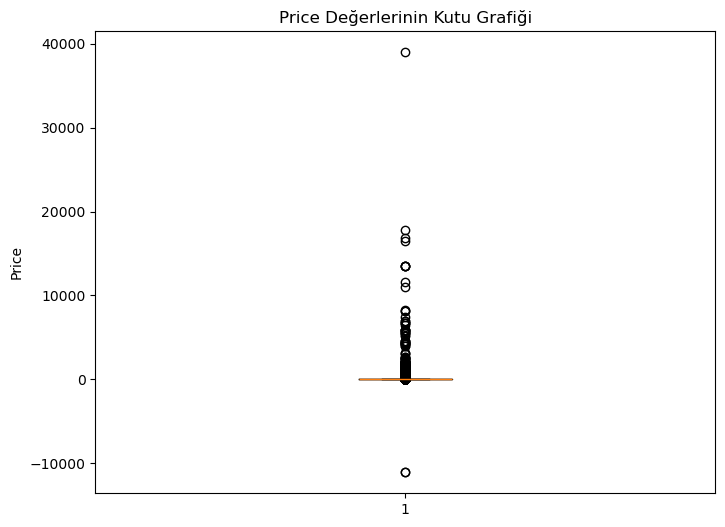

In [6]:
#Price ve Quantity için aykırı değerleri kontrol etmek
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.boxplot(df["Price"])
plt.title('Price Değerlerinin Kutu Grafiği')
plt.ylabel('Price')
plt.show()



C:\Users\musta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\musta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


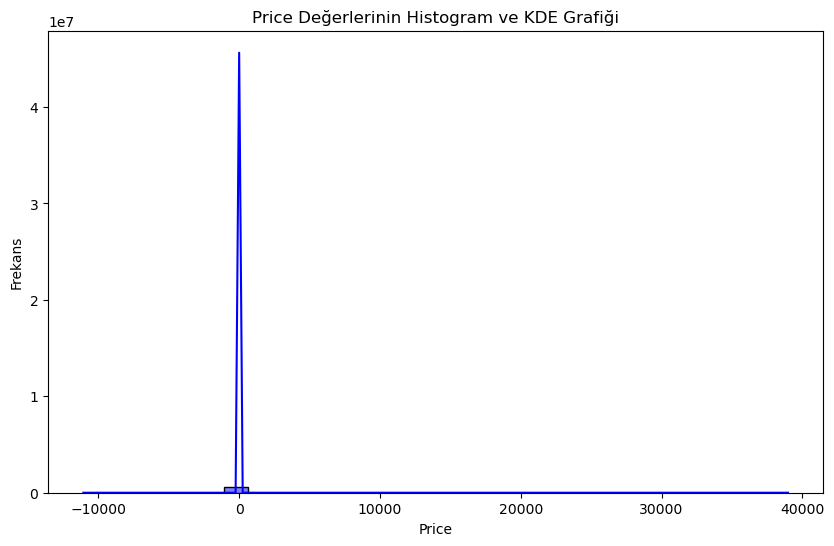

In [7]:
import seaborn as sns
#'Price' sütunundaki değerlerin histogramı ve KDE grafiği
plt.figure(figsize=(10, 6))
sns.histplot(df["Price"], kde=True, color='blue', bins=30)
plt.title('Price Değerlerinin Histogram ve KDE Grafiği')
plt.xlabel('Price')
plt.ylabel('Frekans')
plt.show()

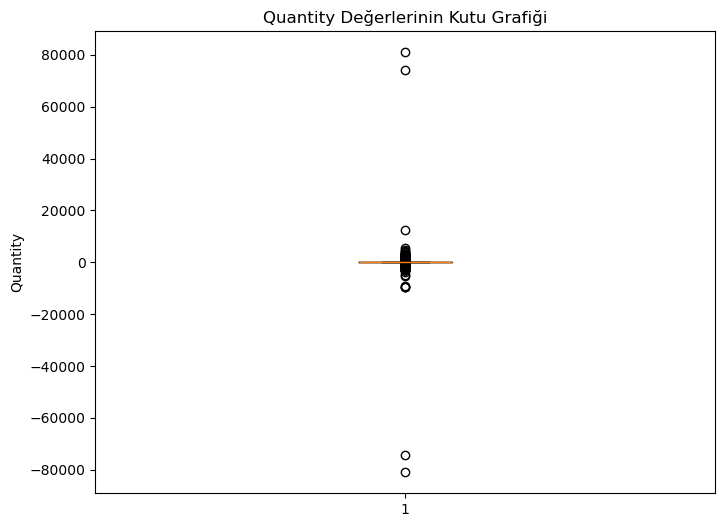

In [8]:
#Price ve Quantity için aykırı değerleri kontrol etmek
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.boxplot(df["Quantity"])
plt.title('Quantity Değerlerinin Kutu Grafiği')
plt.ylabel('Quantity')
plt.show()


C:\Users\musta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\musta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


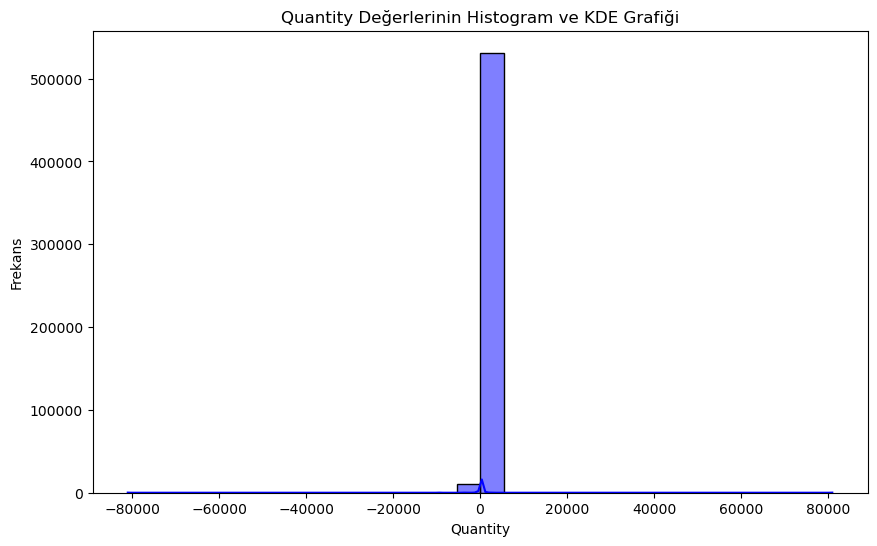

In [9]:
import seaborn as sns
#'Price' sütunundaki değerlerin histogramı ve KDE grafiği
plt.figure(figsize=(10, 6))
sns.histplot(df["Quantity"], kde=True, color='blue', bins=30)
plt.title('Quantity Değerlerinin Histogram ve KDE Grafiği')
plt.xlabel('Quantity')
plt.ylabel('Frekans')
plt.show()

In [10]:
df["Price"].describe()

count    541910.000000
mean          4.611138
std          96.759765
min      -11062.060000
25%           1.250000
50%           2.080000
75%           4.130000
max       38970.000000
Name: Price, dtype: float64

In [11]:
df["Quantity"].describe()

count    541910.000000
mean          9.552234
std         218.080957
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

In [12]:
from scipy.stats import zscore
z_scores=zscore(df["Price"])
# 3'ten büyük veya küçük olan Z-skorları aykırı kabul etmek
outliers = (z_scores > 3) | (z_scores < -3)
print(df["Price"][outliers])

1815       569.77
3041       607.49
4989       295.00
5686       498.47
6165       887.52
           ...   
536834    1008.96
537254    1683.75
539368     938.59
540908     933.17
541540    1714.17
Name: Price, Length: 374, dtype: float64


In [13]:
from scipy.stats import zscore
z_scores=zscore(df["Quantity"])
# 3'ten büyük veya küçük olan Z-skorları aykırı kabul etmek
outliers = (z_scores > 3) | (z_scores < -3)
print(df["Quantity"][outliers])

4268      -9360
4850       1824
4945       2880
4946       1400
6365       1440
          ...  
540061      698
540070     1500
540071     1200
540421    80995
540422   -80995
Name: Quantity, Length: 346, dtype: int64


In [14]:
#Price değişkenlerini baskılamak
df["Price"] = replace_with_thresholds(df, "Price")["Price"]

In [15]:
#Quantity değişkenlerini baskılamak
df["Quantity"] = replace_with_thresholds(df, "Quantity")["Quantity"]

In [16]:
#Baskılamadan sonra kontrol
df["Price"].describe()


count    541910.000000
mean          0.933336
std           0.191639
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: Price, dtype: float64

In [17]:
#Baskılamadan sonra kontrol
df["Quantity"].describe()

count    541910.000000
mean          3.478487
std           2.362061
min          -6.000000
25%           1.000000
50%           3.000000
75%           6.000000
max           6.000000
Name: Quantity, dtype: float64

In [18]:
#Alman müşteriler için kuralları belirlemek
df_ger=df[df["Country"]=="Germany"]
df_ger.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1109,536527,22809,SET OF 6 T-LIGHTS SANTA,6,2010-12-01 13:04:00,1.0,12662.0,Germany
1110,536527,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,6,2010-12-01 13:04:00,1.0,12662.0,Germany
1111,536527,84945,MULTI COLOUR SILVER T-LIGHT HOLDER,6,2010-12-01 13:04:00,1.0,12662.0,Germany
1112,536527,22242,5 HOOK HANGER MAGIC TOADSTOOL,6,2010-12-01 13:04:00,1.0,12662.0,Germany
1113,536527,22244,3 HOOK HANGER MAGIC GARDEN,6,2010-12-01 13:04:00,1.0,12662.0,Germany


In [19]:
def create_invoice_product_df(dataframe,id=False):
    if id:
        return dataframe.groupby(["Invoice","StockCode"])["Quantity"].sum().unstack().fillna(0).applymap(lambda x:1 if x>0 else 0)
    else:
        return dataframe.groupby(["Invoice","Description"])["Quantity"].sum().unstack().fillna(0).applymap(lambda x:1 if x>0 else 0)


In [20]:
def check_id(dataframe, stock_code):
    product_name = dataframe[dataframe["StockCode"] == stock_code][["Description"]].values[0].tolist()
    print(product_name)

In [21]:
gr_inv_pro_df = create_invoice_product_df(df_ger,id=True)
gr_inv_pro_df.head()

C:\Users\musta\AppData\Local\Temp\ipykernel_8188\177857625.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return dataframe.groupby(["Invoice","StockCode"])["Quantity"].sum().unstack().fillna(0).applymap(lambda x:1 if x>0 else 0)


StockCode  10002  10125  10135  11001  15034  15036  15039  16008  16011  16014  16016  16045  16054  16218  16235  16236  16237  16238  16259  17003  20652  20658  20665  20668  20674  20675  20676  20677  20679  20681  20682  20684  20685  20696  20702  20703  20704  20705  20707  20711  20712  \
Invoice                                                                                                                                                                                                                                                                                                    
536527         0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      1   
536840         0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0   
536861         0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0   
536967         0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0   
536983         0      0      0      0      0      0      0      0      0      0      1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0   

StockCode  20713  20716  20717  20718  20719  20723  20724  20725  20726  20727  20728  20749  20750  20751  20752  20754  20755  20761  20766  20767  20772  20774  20794  20796  20828  20846  20897  20902  20903  20914  20957  20961  20963  20971  20972  20973  20974  20975  20977  20978  20979  \
Invoice                                                                                                                                                                                                                                                                                                    
536527         1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0   
536840         0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0   
536861         0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0   
536967         0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0   
536983         0      0      0      0      0      0      0      0      0      0      0      0      

In [22]:
check_id(df_ger, 17003  )

['BROCADE RING PURSE ']


In [23]:
#!pip install mlxtend
from mlxtend.frequent_patterns import apriori, association_rules

def create_rules(dataframe, id=True, country="Germany"):
    dataframe = dataframe[dataframe['Country'] == country]
    dataframe = create_invoice_product_df(dataframe, id)
    frequent_itemsets = apriori(dataframe, min_support=0.00001, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="support", min_threshold=0.00001)
    return rules

#rules = create_rules(df)
#Burda bellek hatası aldığım için daha küçük dataseti ile çalışmaya devam edeceğim 
selected_columns = ['Invoice', 'StockCode', 'Quantity', 'Country', 'Description']
filtered_data = df[(df['Country'] == 'Germany')]
filtered_data = filtered_data[selected_columns]
filtered_data.head()

,Invoice,StockCode,Quantity,Country,Description
1109,536527,22809,6,Germany,SET OF 6 T-LIGHTS SANTA
1110,536527,84347,6,Germany,ROTATING SILVER ANGELS T-LIGHT HLDR
1111,536527,84945,6,Germany,MULTI COLOUR SILVER T-LIGHT HOLDER
1112,536527,22242,6,Germany,5 HOOK HANGER MAGIC TOADSTOOL
1113,536527,22244,6,Germany,3 HOOK HANGER MAGIC GARDEN


In [24]:
rules=create_rules(filtered_data)
#Bu aşamada tekniki sebeplerden dolayı bellek yetersizliği yaşadım ama yine de kodun devamını alt kısımda bulabilirsiniz.

C:\Users\musta\AppData\Local\Temp\ipykernel_8188\177857625.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return dataframe.groupby(["Invoice","StockCode"])["Quantity"].sum().unstack().fillna(0).applymap(lambda x:1 if x>0 else 0)
C:\Users\musta\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


MemoryError: Unable to allocate 1.01 TiB for an array with shape (76588838, 3, 603) and data type int64

In [ ]:
#Kullanıcılara Ürün Önermek ve İsimlerine Bakmak

def arl_recommender(rules_df, product_id, rec_count=1):
    sorted_rules = rules_df.sort_values("lift", ascending=False)
    recommendation_list = []
    for i, product in enumerate(sorted_rules["antecedents"]):
        for j in list(product):
            if j == product_id:
                recommendation_list.append(list(sorted_rules.iloc[i]["consequents"])[0])

    return recommendation_list[0:rec_count]


arl_recommender(rules, 15036, 1)
arl_recommender(rules, 16011, 2)
arl_recommender(rules, 17003, 3)
